In [6]:
# to install tensorflow

# import sys
# !{sys.executable} -m pip install -U tensorflow

In [1]:
# standard quantitative packages
import numpy as np
import pandas as pd

# machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# visualisation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# tensorflow and keras for deep learning
import tensorflow as tf
from tensorflow import keras

In [2]:
# lets run a multilayer perceptron on the California housing dataset
#   Note: this is a simplified version of the dataset with no missing data and no string/text data

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
# create training, testing, and validation datasets
#     Training set: used to fit the model
#     Validation set: used to fine-tune the model
#     Test set: 'blind data' used to check the accuracy of the model
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [4]:
# set up a basic deep learning model
#    Sequential model: one input and one output layer
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test, batch_size=128)
print("test loss:", mse_test)

# MSE doesn't have a 'best score', but we want it to be as close to zero as possible
#    Best to use as a comparator when choosing between models

Epoch 1/20


2022-07-04 11:21:15.027327: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


363/363 [==============================] - 1s 2ms/step - loss: 0.7414 - val_loss: 4.3071
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8040 - val_loss: 1.3435
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5049 - val_loss: 2.5739
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5034 - val_loss: 4.0680
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5885 - val_loss: 0.4166
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3863 - val_loss: 0.3874
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3763 - val_loss: 0.3753
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3695 - val_loss: 0.3748
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3612 - val_loss: 0.3643
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3564 - val_loss: 0.3597
Epoch 11/2

In [5]:
# r_square for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# re-running the sequential model with these metrics
model.compile(loss='mean_squared_error', optimizer='sgd', 
              metrics=[rmse, r_square])
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))

# testing the model on the test dataset
y_pred = model.predict(X_test)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3308 - rmse: 0.4018 - r_square: 0.7339 - val_loss: 0.3371 - val_rmse: 0.4108 - val_r_square: 0.7229
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3299 - rmse: 0.4010 - r_square: 0.7329 - val_loss: 0.3387 - val_rmse: 0.4094 - val_r_square: 0.7235
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3278 - rmse: 0.4004 - r_square: 0.7320 - val_loss: 0.3336 - val_rmse: 0.4062 - val_r_square: 0.7259
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3270 - rmse: 0.3989 - r_square: 0.7400 - val_loss: 0.3329 - val_rmse: 0.4090 - val_r_square: 0.7253
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3249 - rmse: 0.3976 - r_square: 0.7375 - val_loss: 0.3321 - val_rmse: 0.4117 - val_r_square: 0.7246
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3246 - rmse: 0.3970 - r_square: 0.7377 - val

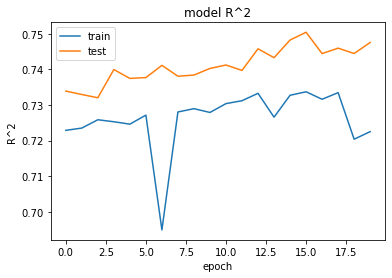

In [6]:
# plot training curve for R^2
plt.plot(history.history['val_r_square'])
plt.plot(history.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

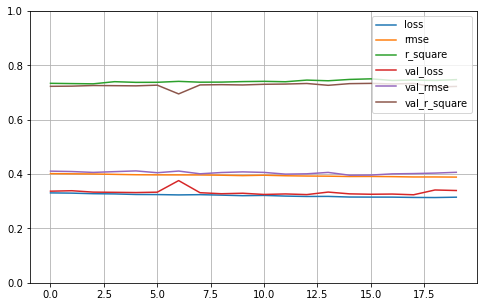

In [7]:
# alternative plot with all metrics
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.4809 - rmse: 1.0213 - r_square: -1.0040 - val_loss: 1.6457 - val_rmse: 0.6822 - val_r_square: -0.8147
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7874 - rmse: 0.6302 - r_square: 0.3578 - val_loss: 0.7110 - val_rmse: 0.6110 - val_r_square: 0.4185
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6442 - rmse: 0.5861 - r_square: 0.4880 - val_loss: 0.6245 - val_rmse: 0.5748 - val_r_square: 0.5099
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6017 - rmse: 0.5611 - r_square: 0.5219 - val_loss: 0.5930 - val_rmse: 0.5592 - val_r_square: 0.5334
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5737 - rmse: 0.5482 - r_square: 0.5452 - val_loss: 0.5700 - val_rmse: 0.5458 - val_r_square: 0.5526
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5534 - rmse: 0.5370 - r_square: 0.5574 - v

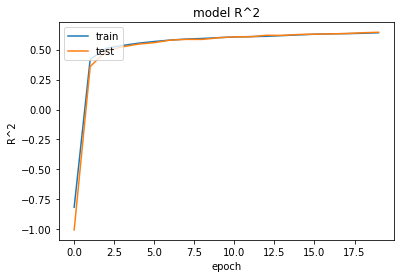

In [8]:
# we'll now build a more complex model using the Functional API
#    This allows greater flexibility over a standard Sequential model
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model2 = keras.Model(inputs=[input_], outputs=[output])

model2.compile(loss='mse', metrics=[rmse, r_square], 
               optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history2 = model2.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
y_pred = model2.predict(X_test)

plt.plot(history2.history['val_r_square'])
plt.plot(history2.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Results based on the MSE (loss statistic) don't appear to be as good

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.2791 - rmse: 1.1144 - r_square: -0.8120 - val_loss: 3.4586 - val_rmse: 0.8076 - val_r_square: -3.2196
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0456 - rmse: 0.7118 - r_square: 0.2103 - val_loss: 0.9959 - val_rmse: 0.6653 - val_r_square: 0.1065
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7317 - rmse: 0.6357 - r_square: 0.4189 - val_loss: 0.7148 - val_rmse: 0.6339 - val_r_square: 0.4286
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6549 - rmse: 0.6022 - r_square: 0.4708 - val_loss: 0.6487 - val_rmse: 0.6021 - val_r_square: 0.4846
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6078 - rmse: 0.5779 - r_square: 0.5157 - val_loss: 0.6037 - val_rmse: 0.5753 - val_r_square: 0.5199
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5684 - rmse: 0.5556 - r_square: 0.5453 - v

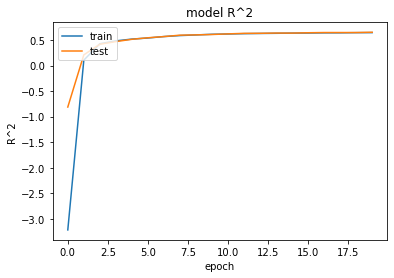

In [9]:
# what if we wanted some features to be direct predictors and some features to go through
#    hidden layers? This might be useful when we have a spread of known strong predictors
#    and some weaker indirect predictors
# We are going to send features 0 to 4 through direct prediction, and features 2 to 7
#   (so we are using some of the features twice) through hidden layers
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model3 = keras.Model(inputs=[input_A, input_B], outputs=[output])

model3.compile(loss='mse', metrics=[rmse, r_square],
             optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

history3 = model3.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model3.evaluate((X_test_A, X_test_B), y_test)

y_pred = model3.predict((X_test_A, X_test_B))

plt.plot(history3.history['val_r_square'])
plt.plot(history3.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
# optimising parameters using gridsearch

# we first build a basic sequential model function similar to the first model above
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', metrics=[rmse, r_square],
                 optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(20, 60),
    'learning_rate': reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=50,
                 validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Epoch 1/50


/opt/anaconda3/envs/smm750/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app


242/242 [==============================] - 1s 4ms/step - loss: 3.1744 - rmse: 1.3864 - r_square: -1.5840 - val_loss: 2.8305 - val_rmse: 0.9107 - val_r_square: -2.0164
Epoch 2/50
242/242 [==============================] - 1s 3ms/step - loss: 1.1592 - rmse: 0.7834 - r_square: 0.0780 - val_loss: 2.9063 - val_rmse: 0.7661 - val_r_square: -2.4967
Epoch 3/50
242/242 [==============================] - 1s 3ms/step - loss: 0.9179 - rmse: 0.7187 - r_square: 0.2649 - val_loss: 2.5850 - val_rmse: 0.7276 - val_r_square: -2.1394
Epoch 4/50
242/242 [==============================] - 1s 3ms/step - loss: 0.8298 - rmse: 0.6877 - r_square: 0.3358 - val_loss: 2.2953 - val_rmse: 0.6985 - val_r_square: -1.7720
Epoch 5/50
242/242 [==============================] - 1s 3ms/step - loss: 0.7808 - rmse: 0.6654 - r_square: 0.3726 - val_loss: 2.0324 - val_rmse: 0.6750 - val_r_square: -1.4224
Epoch 6/50
242/242 [==============================] - 1s 3ms/step - loss: 0.7475 - rmse: 0.6473 - r_square: 0.3986 - val_loss

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fdcb235d950>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdcb324a1d0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59])})

In [11]:
rnd_search_cv.best_params_

{'learning_rate': 0.012442451334742626, 'n_hidden': 2, 'n_neurons': 41}

In [12]:
rnd_search_cv.best_score_

-0.3092704216639201

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2662 - rmse: 0.3540 - r_square: 0.7851 - val_loss: 0.2908 - val_rmse: 0.3784 - val_r_square: 0.7609
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2651 - rmse: 0.3533 - r_square: 0.7853 - val_loss: 0.2953 - val_rmse: 0.3771 - val_r_square: 0.7573
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2655 - rmse: 0.3538 - r_square: 0.7867 - val_loss: 0.2860 - val_rmse: 0.3691 - val_r_square: 0.7660
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2646 - rmse: 0.3524 - r_square: 0.7866 - val_loss: 0.2935 - val_rmse: 0.3891 - val_r_square: 0.7592
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2640 - rmse: 0.3527 - r_square: 0.7820 - val_loss: 0.2867 - val_rmse: 0.3650 - val_r_square: 0.7683
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.2637 - rmse: 0.3526 - r_square: 0.7869 - val

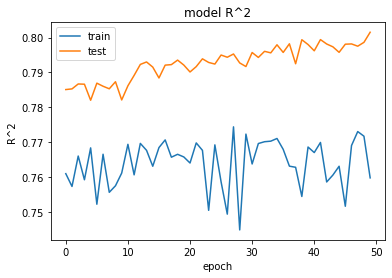

In [13]:
model4 = rnd_search_cv.best_estimator_.model

history4 = model4.fit(X_train, y_train, epochs=50,
                   validation_data=(X_valid, y_valid))
y_pred = model4.predict(X_test)

plt.plot(history4.history['val_r_square'])
plt.plot(history4.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# LSTM deep learning models for stock price prediction
#    Long Short Term Model - a type of Recurrent Neural Network

tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-02,244.296005,245.600006,237.119995,241.731995,241.731995,86250500
1,2020-07-06,255.337997,275.558014,253.207993,274.316010,274.316010,102849500
2,2020-07-07,281.002014,285.899994,267.342010,277.971985,277.971985,107448500
3,2020-07-08,281.000000,283.451996,262.268005,273.175995,273.175995,81556500
4,2020-07-09,279.398010,281.712006,270.256012,278.855988,278.855988,58588000


In [15]:
# reduce the dataset down to just the necessary data

tesla = tesla[['Date','Open','Close']] 
tesla['Date'] = pd.to_datetime(tesla['Date']) 
tesla.set_index('Date',drop=True,inplace=True) 
tesla.head()

,Open,Close
Date,,
2020-07-02,244.296005,241.731995
2020-07-06,255.337997,274.316010
2020-07-07,281.002014,277.971985
2020-07-08,281.000000,273.175995
2020-07-09,279.398010,278.855988


/opt/anaconda3/envs/smm750/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


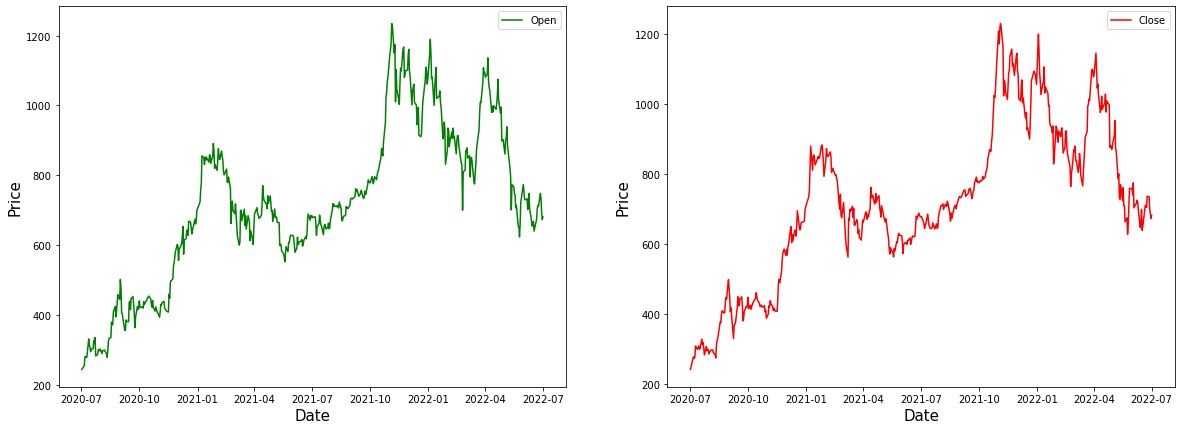

In [16]:
# chart the open and close stock prices

fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(tesla['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[1].plot(tesla['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()
fig.show()

/opt/anaconda3/envs/smm750/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


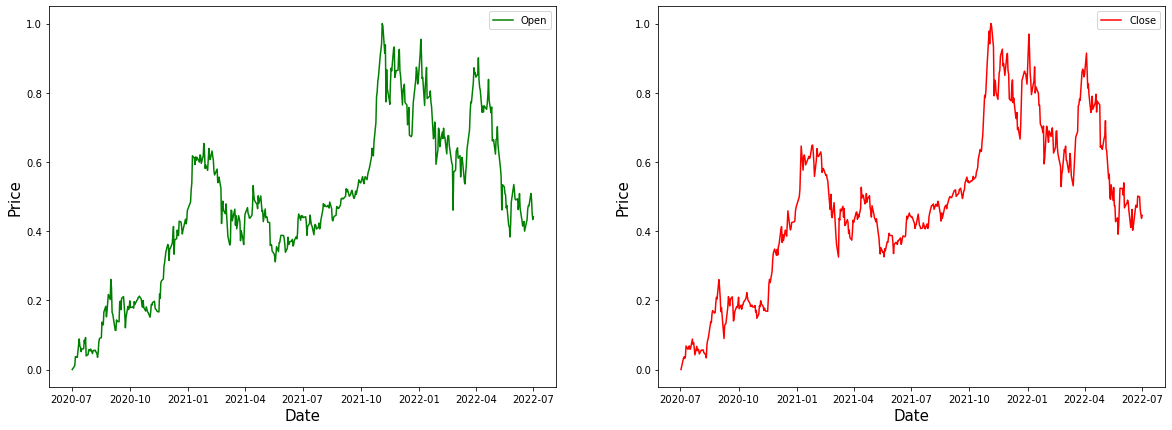

In [17]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
tesla[tesla.columns] = MinMax.fit_transform(tesla)

fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(tesla['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[1].plot(tesla['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()
fig.show()

In [18]:
# create a training and test dataset that trains on the first (chronologically) 80% of datapoints
training_size = round(len(tesla) * 0.80)
train_data = tesla[:training_size]
test_data  = tesla[training_size:]

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)


In [19]:
# run the LSTM model

model5 = keras.models.Sequential()
model5.add(keras.layers.LSTM(units=50, return_sequences=True, 
               input_shape = (train_seq.shape[1], train_seq.shape[2])))

model5.add(keras.layers.Dropout(0.1)) 
model5.add(keras.layers.LSTM(units=50))

model5.add(keras.layers.Dense(2))

model5.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model5.summary()


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_88 (Dense)            (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [20]:
model5.fit(train_seq, train_label, epochs=40,validation_data=(test_seq, test_label), verbose=1)
test_predicted = model5.predict(test_seq)
test_inverse_predicted = MinMax.inverse_transform(test_predicted)

Epoch 1/40
12/12 [==============================] - 5s 125ms/step - loss: 0.1010 - mean_absolute_error: 0.2507 - val_loss: 0.0431 - val_mean_absolute_error: 0.1901
Epoch 2/40
12/12 [==============================] - 1s 46ms/step - loss: 0.0138 - mean_absolute_error: 0.0909 - val_loss: 0.0071 - val_mean_absolute_error: 0.0669
Epoch 3/40
12/12 [==============================] - 1s 47ms/step - loss: 0.0084 - mean_absolute_error: 0.0690 - val_loss: 0.0069 - val_mean_absolute_error: 0.0665
Epoch 4/40
12/12 [==============================] - 1s 47ms/step - loss: 0.0060 - mean_absolute_error: 0.0577 - val_loss: 0.0113 - val_mean_absolute_error: 0.0885
Epoch 5/40
12/12 [==============================] - 1s 48ms/step - loss: 0.0051 - mean_absolute_error: 0.0512 - val_loss: 0.0090 - val_mean_absolute_error: 0.0759
Epoch 6/40
12/12 [==============================] - 1s 48ms/step - loss: 0.0049 - mean_absolute_error: 0.0515 - val_loss: 0.0076 - val_mean_absolute_error: 0.0680
Epoch 7/40
12/12 [===

In [21]:
len(test_seq)

51

In [22]:
# Merging actual and predicted data for better visualization
tesla_predict = pd.concat([tesla.iloc[-51:].copy(),pd.DataFrame
                           (test_inverse_predicted,columns=['open_predicted','close_predicted']
                            ,index=tesla.iloc[-51:].index)], axis=1)

tesla_predict[['Open','Close']] = MinMax.inverse_transform(tesla_predict[['Open','Close']])

tesla_predict.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2022-04-20,1030.000000,977.200012,990.365417,982.473816
2022-04-21,1074.729980,1008.780029,984.274292,980.200073
2022-04-22,1014.909973,1005.049988,984.157776,984.947754
2022-04-25,978.969971,998.020020,984.380371,988.299500
2022-04-26,995.429993,876.419983,983.492310,988.658875


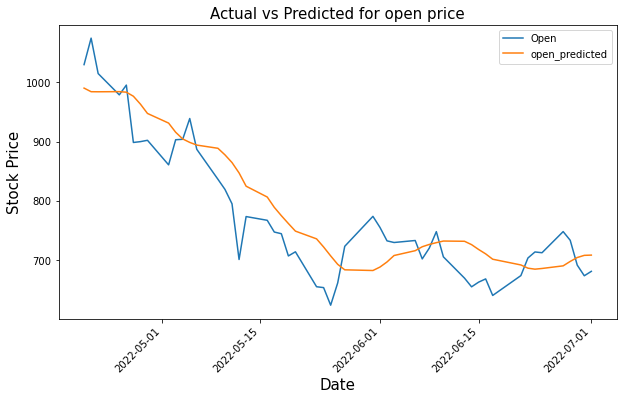

In [23]:
# chart showing prediction

tesla_predict[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

In [24]:
tesla_predict.tail()

,Open,Close,open_predicted,close_predicted
Date,,,,
2022-06-27,748.099976,734.760010,690.273682,696.947449
2022-06-28,733.450012,697.989990,697.729187,707.552612
2022-06-29,691.500000,685.469971,704.328979,715.160400
2022-06-30,673.530029,673.419983,707.986206,717.638245
2022-07-01,681.000000,681.789978,708.397522,715.502502


In [25]:
# Predict the next ten days stock prices
#   1. Create extra rows for those next ten days

tesla_predict = tesla_predict.append(
    pd.DataFrame(columns=tesla_predict.columns,index=pd.date_range(
        start=tesla_predict.index[-1], periods=11, freq='D', closed='right')))

tesla_predict.tail(15)

,Open,Close,open_predicted,close_predicted
2022-06-27,748.099976,734.760010,690.273682,696.947449
2022-06-28,733.450012,697.989990,697.729187,707.552612
2022-06-29,691.500000,685.469971,704.328979,715.160400
2022-06-30,673.530029,673.419983,707.986206,717.638245
2022-07-01,681.000000,681.789978,708.397522,715.502502
2022-07-02,NaN,NaN,NaN,NaN
2022-07-03,NaN,NaN,NaN,NaN
2022-07-04,NaN,NaN,NaN,NaN
2022-07-05,NaN,NaN,NaN,NaN
2022-07-06,NaN,NaN,NaN,NaN


/opt/anaconda3/envs/smm750/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


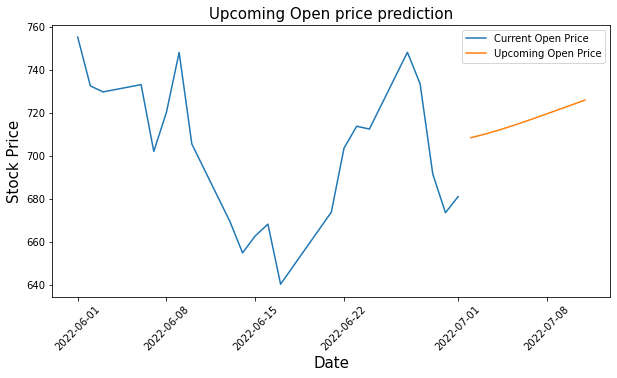

In [26]:
# Predict the next ten days stock prices
#   2. Run the prediction model

upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=tesla_predict.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model5.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)
    
upcoming_prediction[['Open','Close']] = MinMax.inverse_transform(
    upcoming_prediction[['Open','Close']])

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(tesla_predict.loc['2022-06-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2022-06-01':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()